In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

## Thermodynamic Calculations

MetPy has in increasing number of available calculations that can be performed on sounding data.

* LCL
* LFC
* EL
* CAPE
* CIN

Documentation of MetPy calculations at https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html



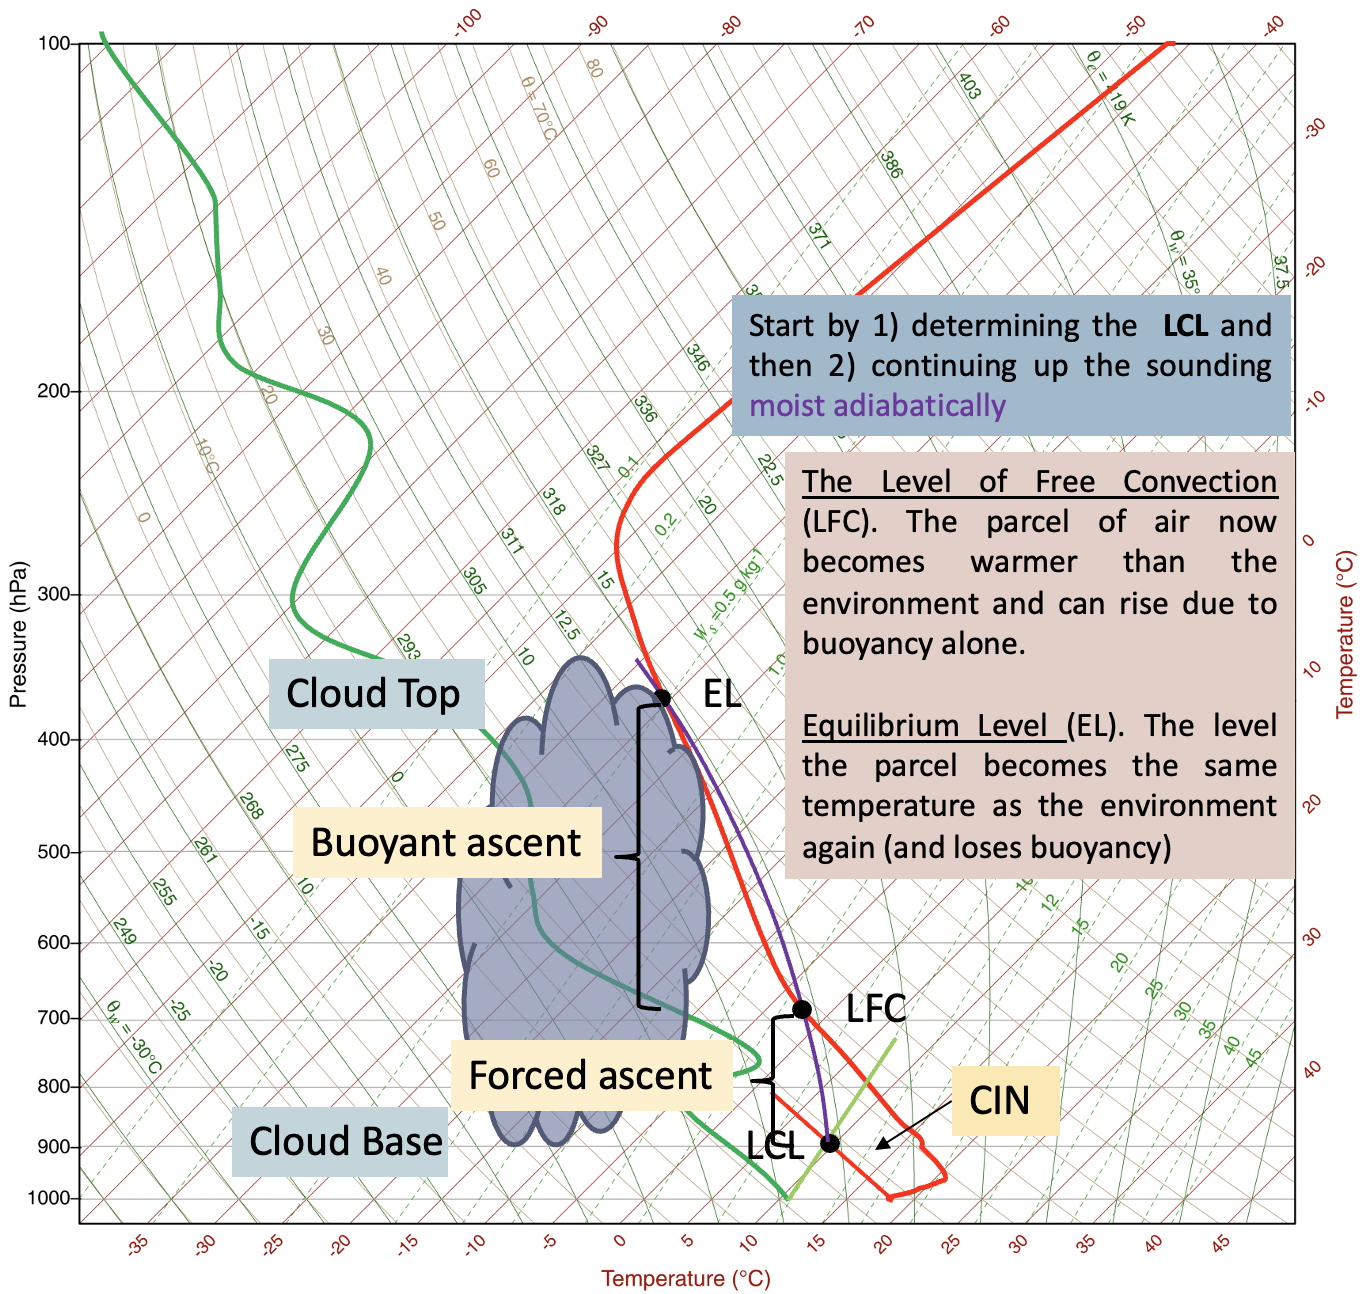

In [ ]:
date = datetime(2011, 4, 27, 0)
station = 'BMX'
df = WyomingUpperAir.request_data(date, station)
data_with_units = pandas_dataframe_to_unit_arrays(df)

# Only want to pull in data up to 100 mb, we can 
# use a boolean array to choose on the desired values


# Subset pressure and read in other data to only 100 mb

# DRL Add T, Td

## Compute the Potential Temperature

The difficult part of using functions from modules to compute them is figuring out how they work and what you need to feed the function. Potential temperature is a valuable variable that takes a parcel at a given pressure level and brings it adiabatically to 1000-hPa. Mathematically it is

$$\theta = T \big(\frac{p}{p_0}\big)^\frac{R_d}{C_p}$$

So to calculate the potential temperature you need the temperatre and pressure levels of those temperatures.

https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.potential_temperature.html

## Example Calculation Function from MetPy

Calculating a parcel profile can also be done using MetPy.

```python
def parcel_profile(pressure, temperature, dewpt):
"""Calculate the profile a parcel takes through the atmosphere.

    The parcel starts at `temperature`, and `dewpt`, lifted up
    dry adiabatically to the LCL, and then moist adiabatically from there.
    `pressure` specifies the pressure levels for the profile.

    Parameters
    ----------
    pressure : `pint.Quantity`
        The atmospheric pressure level(s) of interest. This array must be from
        high to low pressure.
    temperature : `pint.Quantity`
        The starting temperature
    dewpt : `pint.Quantity`
        The starting dewpoint

    Returns
    -------
    `pint.Quantity`
        The parcel temperatures at the specified pressure levels.

    See Also
    --------
    lcl, moist_lapse, dry_lapse

    """
    _, _, _, t_l, _, t_u = _parcel_profile_helper(pressure, temperature, dewpt)
    return concatenate((t_l, t_u))
```

So the input is all of the pressures from the sounding you are calculating the profile for, with the temperature and dewpoint of the parcel that will be lifted to generate the parcel profile temperature.

In [ ]:
#Parcel Ascent


In [ ]:
#Poor man's Lifted Index


## LCL Example Calculation

With some functions we get more than one output (similar to the `np.where` function and so many others). For certain index calculations we'll have both a pressure level and a temperature returned from the function.

These two can be immediately unpacked by having two variable names to the left of the equal sign. This makes things a little nice to work with for reporting and plotting purposes.

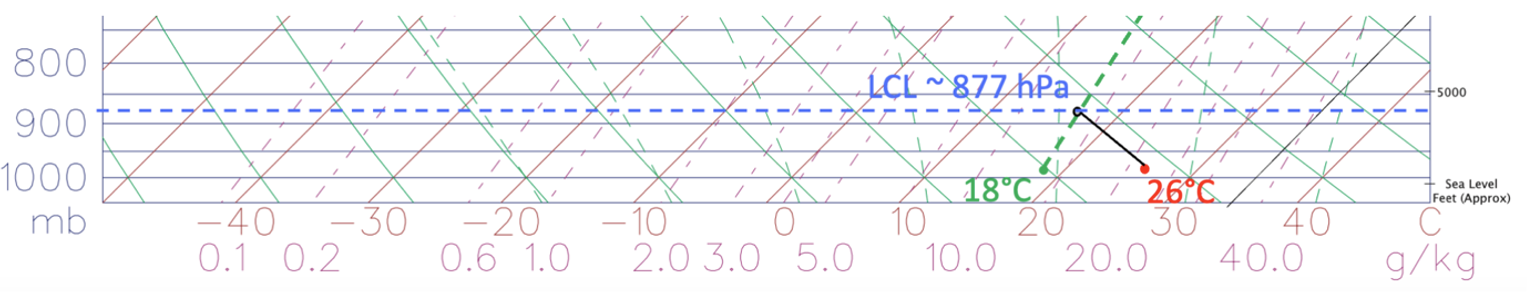